In [1]:
from google.colab import files
upload = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [15]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


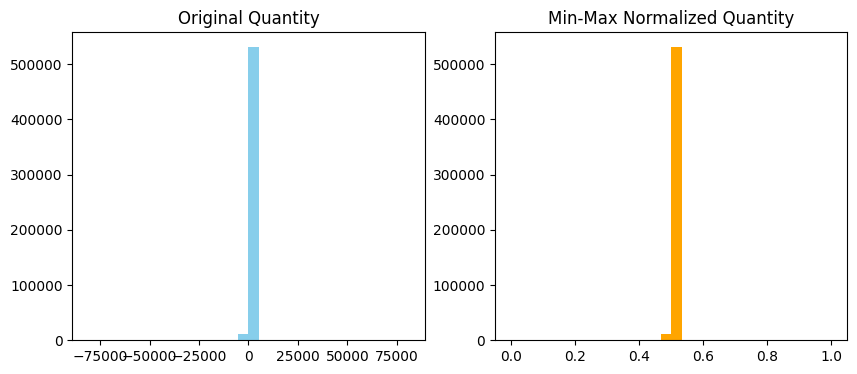

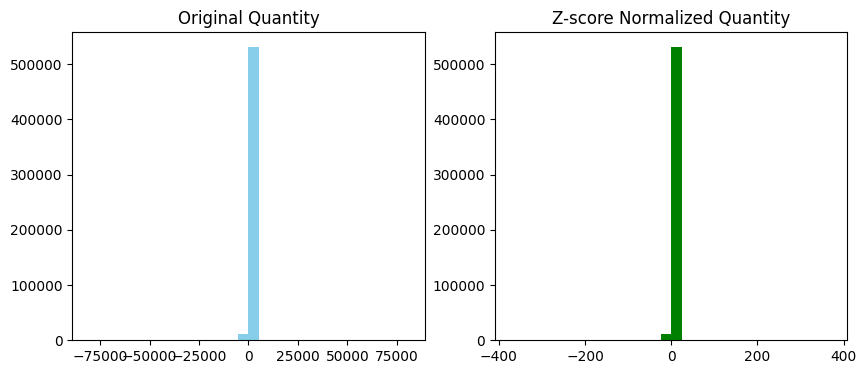

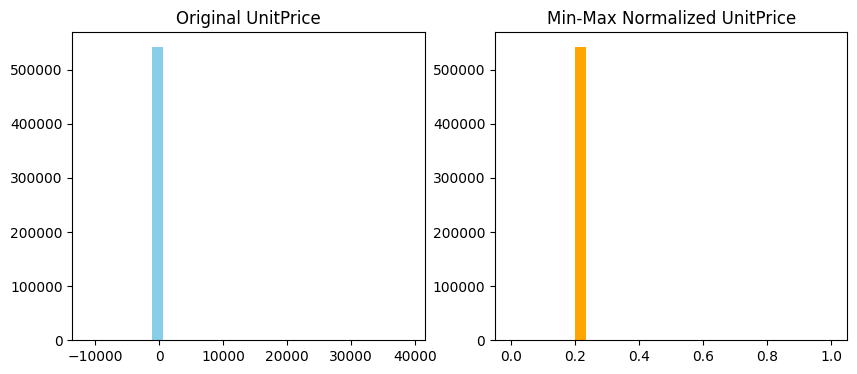

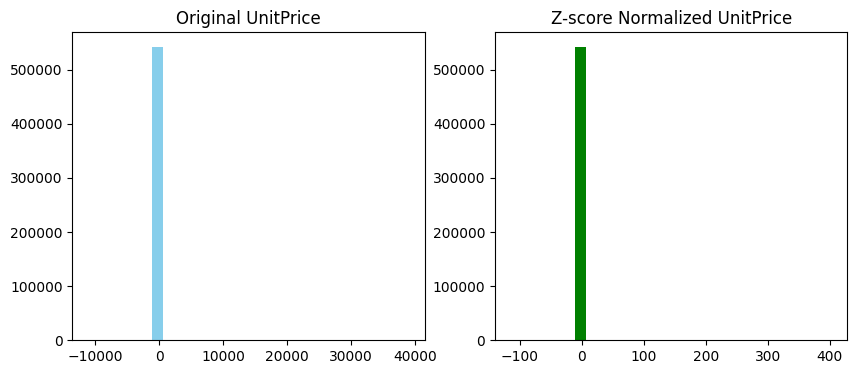

In [14]:
#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Online Retail.xlsx')

# Select two numeric columns
cols = ['Quantity', 'UnitPrice']

# Min-Max normalization
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[cols] = min_max_scaler.fit_transform(df[cols])

# Z-score normalization
z_score_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[cols] = z_score_scaler.fit_transform(df[cols])

# Plot before and after
for col in cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=30, color='skyblue')
    plt.title(f'Original {col}')

    plt.subplot(1,2,2)
    plt.hist(df_minmax[col], bins=30, color='orange')
    plt.title(f'Min-Max Normalized {col}')
    plt.show()

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=30, color='skyblue')
    plt.title(f'Original {col}')

    plt.subplot(1,2,2)
    plt.hist(df_zscore[col], bins=30, color='green')
    plt.title(f'Z-score Normalized {col}')
    plt.show()


In [19]:
#Discretization of a numeric column using equal-width binning
df['Quantity_bin'] = pd.cut(df['Quantity'], bins=3, labels=['Low', 'Medium', 'High'])

#Discretization of a numberic column using equal-frequency binnin
df['UnitPrice_bin'] = pd.qcut(df['UnitPrice'], q=3, labels=['Low', 'Medium', 'High'])

#View the first few rows to verify
print(df[['Quantity', 'Quantity_bin', 'UnitPrice', 'UnitPrice_bin']].head())

   Quantity Quantity_bin  UnitPrice UnitPrice_bin
0         6       Medium       2.55        Medium
1         6       Medium       3.39          High
2         8       Medium       2.75        Medium
3         6       Medium       3.39          High
4         6       Medium       3.39          High


In [18]:
#Feature Selection (Dimensionality Reduction)
# Create new features
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
df['DiscountedPrice'] = df['UnitPrice'] * 0.9  # Example 10% discount

# View new features
print(df[['TotalSpent', 'DiscountedPrice']].head())

   TotalSpent  DiscountedPrice
0       15.30            2.295
1       20.34            3.051
2       22.00            2.475
3       20.34            3.051
4       20.34            3.051


In [17]:
#Sampling (Numerosity Reduction)
#Randon sample 25%
df_sample = df.sample(frac = 0.25, random_state = 42)

#compare summary statistics
print(df_sample.describe())
print(df.describe())

            Quantity  ...     CustomerID
count  135477.000000  ...  101666.000000
mean        9.436642  ...   15288.331832
min    -80995.000000  ...   12346.000000
25%         1.000000  ...   13956.000000
50%         3.000000  ...   15150.000000
75%        10.000000  ...   16794.000000
max     74215.000000  ...   18287.000000
std       303.311185  ...    1714.052529

[8 rows x 4 columns]
            Quantity  ...     CustomerID
count  541909.000000  ...  406829.000000
mean        9.552250  ...   15287.690570
min    -80995.000000  ...   12346.000000
25%         1.000000  ...   13953.000000
50%         3.000000  ...   15152.000000
75%        10.000000  ...   16791.000000
max     80995.000000  ...   18287.000000
std       218.081158  ...    1713.600303

[8 rows x 4 columns]


# 🟩 Reflections and Explanations

 **Reflection on Normalization:**
- **Min-Max:**  
  Preferred when you want to scale features to a fixed range (like 0 to 1).  
- **Z-score:**  
  Useful when you want to center data and remove outliers.

 **Explanation of Binning Choices:**  
- We chose 3 bins to divide data into simple categories: **low**, **medium**, and **high**.  
- **Equal-width binning:** good when data is uniformly distributed.  
- **Equal-frequency binning:** good when data is skewed or has outliers.  
- Binning helps to **discretize** continuous data for categorical analysis.

 **Feature Engineering Explanation:**  
- **Total spent:** Helps to see how much was spent on an item.  
- **Discounted price:** Helps to see the effect of discounts and price changes.

 **Reflection on Feature Selection:**  
- **Did you reduce features significantly?**  
  We removed some low-variance features and features that didn’t contribute much to the data’s variation.  
- **Impact on dataset:**  
  Reduced dimensionality improves modeling speed and helps avoid overfitting.

 **Reflection on Sampling:**  
- **Helpful** for faster modeling with large datasets, saving memory and computing power.  
- **Risky** if it removes important data or rare events, leading to bias or under-representation.

---

###  Key Problems Encountered and Solutions

 **Problem:** `KeyError: 'numeric_col1' not in index'`  
 **Solution:** Checked actual column names and replaced placeholders with real column names like `Quantity` and `UnitPrice`.

 **Problem:** `NameError: name 'df_zscore' is not defined`  
 **Solution:** Added Z-score normalization block to define `df_zscore` before plotting.

 **Issue:** Visuals appeared as vertical lines due to skewed data.  
 **Solution:** Consider using log transformations or adjusting bin sizes to visualize distributions more clearly.